In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import pickle
import json

In [7]:
df = pd.read_csv('obese_csv.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [9]:
df.drop('ID', axis =1, inplace = True)

In [11]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.2+ KB


In [21]:
df['Label'].value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

In [25]:
df.isna().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [26]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [27]:
df.columns = ['age', 'gender', 'height', 'weight', 'bmi', 'label']

In [28]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'bmi', 'label'], dtype='object')

<Axes: >

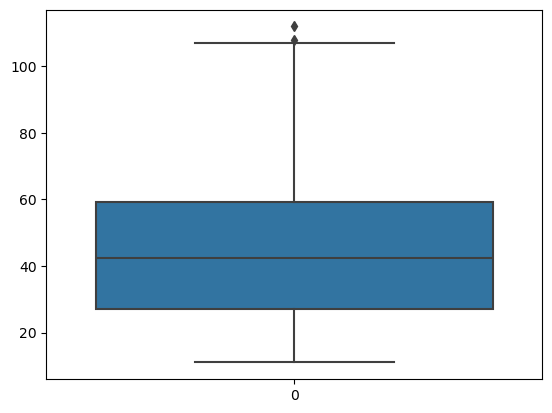

In [34]:
sns.boxplot(df['age'])

In [37]:
q3 = df['age'].quantile(0.75)
q1= df['age'].quantile(0.25)
iqr = q3 - q1
upper = q3 + 1.5* iqr
upper

df['age'] = np.where(df['age'] > upper , upper, df['age'])

In [39]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'bmi', 'label'], dtype='object')

In [41]:
df['gender'] = np.where(df['gender']=='Male', 0, 1)

In [42]:
df.head()

,age,gender,height,weight,bmi,label
0,25.0,0,175,80,25.3,Normal Weight
1,30.0,1,160,60,22.5,Normal Weight
2,35.0,0,180,90,27.3,Overweight
3,40.0,1,150,50,20.0,Underweight
4,45.0,0,190,100,31.2,Obese


In [44]:
df['label'] = np.where(df['label']=='Obese', 1, 0)

In [46]:
df.head()

,age,gender,height,weight,bmi,label
0,25.0,0,175,80,25.3,0
1,30.0,1,160,60,22.5,0
2,35.0,0,180,90,27.3,0
3,40.0,1,150,50,20.0,0
4,45.0,0,190,100,31.2,1


In [48]:
df.head()

,age,gender,height,weight,bmi,label
0,25.0,0,175,80,25.3,0
1,30.0,1,160,60,22.5,0
2,35.0,0,180,90,27.3,0
3,40.0,1,150,50,20.0,0
4,45.0,0,190,100,31.2,1


In [49]:
x = df.drop('label',axis =1)

In [50]:
y= df['label']

In [51]:
mod = LogisticRegression()

In [59]:
y.shape

(108,)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2, stratify = y)

In [64]:
mod = LogisticRegression()
mod.fit(x_train, y_train)

LogisticRegression()

In [65]:
def evaluation(string, model, ind_var, y_act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
    
    mae = mean_absolute_error(y_act, pred)
    print('MAE :', mae)
    
    r_squared = r2_score(y_act, pred)
    print('R2_Score :', r_squared)
    
    adj_r2 = 1 - (((1-r_squared)*(ind_var.shape[0] - 1))/(ind_var.shape[0]- ind_var.shape[1]-1))
    print('Adj-R2_Score :', adj_r2)
    
evaluation('Test Data Evaluation', mod, x_test, y_test)
print()

evaluation('Train Data Evaluation', mod, x_train, y_train)

***************Test Data Evaluation***************
MSE: 0.0
RMSE: 0.0
MAE : 0.0
R2_Score : 1.0
Adj-R2_Score : 1.0

**************Train Data Evaluation***************
MSE: 0.0
RMSE: 0.0
MAE : 0.0
R2_Score : 1.0
Adj-R2_Score : 1.0


In [66]:
x.head(1).values

array([[ 25. ,   0. , 175. ,  80. ,  25.3]])

In [67]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'bmi', 'label'], dtype='object')

In [77]:
age = 25.0
gender ='Male'
height = 149.0
weight = 78.0
bmi = 541.0

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
mod.predict(x.head(1).values)

array([0])

In [71]:
column_num = x.shape[1]

In [73]:
project_data = {'gender':{'Male':0,'Female':1}}

In [79]:
test_array = np.zeros(column_num)
test_array[0]= age
test_array[1] = project_data['gender'][gender]
test_array[2] = height
test_array[3] = weight
test_array[4]= bmi
test_array

array([ 25.,   0., 149.,  78., 541.])

In [83]:
with open('obeselog.pkl', 'wb') as f:
    pickle.dump(mod,f)

In [82]:
with open('project_data.json' ,'w') as f:
    json.dump(project_data,f)